# CHILDES Age vs MLU

In [17]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [18]:
# List of CSV files to process
mlu_files_50 = ['Adam_mlu50.csv', 'Eve_mlu50.csv', 'Sarah_mlu50.csv']  # Uses _mlu50.csv files
mlu_files_100 = ['Adam_mlu100.csv', 'Eve_mlu100.csv', 'Sarah_mlu100.csv']  # Uses _mlu100.csv files
mlu_files_all = ['Adam_mlu.csv', 'Eve_mlu.csv', 'Sarah_mlu.csv']  # Uses _mlu.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
spearman_rhos_50 = []
spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (the other _mlu.csv files do not contain the corresponding ages for each transcript)
age_files = ['Adam_mlu.csv', 'Eve_mlu.csv', 'Sarah_mlu.csv']

In [19]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        months = float(months_and_days[0]) + float(months_and_days[1]) / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [20]:
def age_mlu_plots(mlu_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for mlu_file in mlu_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(mlu_file):
            with open(mlu_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['morphemes/utterances'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['morphemes/utterances'])))  # Collect age and morphemes/utterances
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Morphemes/Utterances
            ages = [t[0] for t in chosen_transcripts]
            morphemes_utterances = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, morphemes_utterances, marker='o')  # scatter plot
            plt.title(f'Age vs MLU for {mlu_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('MLU (Morphemes/Utterances)')
            # plt.xticks([round(age, 2) for age in ages])  # Set x-ticks to show each month with decimals
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, morphemes_utterances)
                spearman_rhos.append([mlu_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {mlu_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {mlu_file}: \n", transcript_list, "\n")
            print(f"MLU Scores for {mlu_file}: \n", morphemes_utterances, "\n")  # Print the MLU scores
            print(f"Ages for {mlu_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {mlu_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs MLU (50 Utterances)

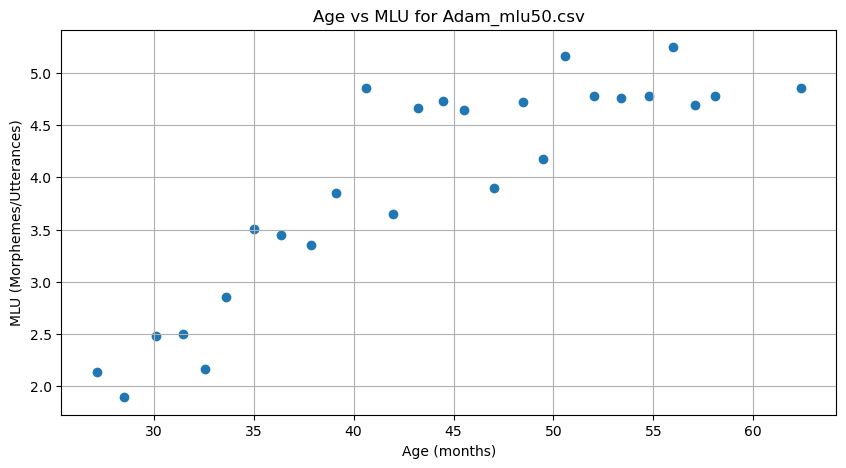

Spearman's rho for Adam_mlu50.csv: 0.8735

Chosen Transcripts for Adam_mlu50.csv: 
 ['020304.ipcore.cex', '020415.ipcore.cex', '020603.ipcore.cex', '020714.ipcore.cex', '020816.ipcore.cex', '020918.ipcore.cex', '021030.ipcore.cex', '030011.ipcore.cex', '030126.ipcore.cex', '030304.ipcore.cex', '030418.ipcore.cex', '030529.ipcore.cex', '030707.ipcore.cex', '030814.ipcore.cex', '030916.ipcore.cex', '031101.ipcore.cex', '040014.ipcore.cex', '040115.ipcore.cex', '040217.ipcore.cex', '040401.ipcore.cex', '040511.ipcore.cex', '040624.ipcore.cex', '040729.ipcore.cex', '040902.ipcore.cex', '041002.ipcore.cex', '050212.ipcore.cex'] 

MLU Scores for Adam_mlu50.csv: 
 [2.14, 1.896, 2.479, 2.5, 2.163, 2.851, 3.51, 3.449, 3.348, 3.848, 4.857, 3.653, 4.66, 4.735, 4.64, 3.894, 4.72, 4.18, 5.16, 4.776, 4.76, 4.776, 5.245, 4.694, 4.78, 4.857] 

Ages for Adam_mlu50.csv: 
 [27.133333333333333, 28.5, 30.1, 31.46666666666667, 32.53333333333333, 33.6, 35.0, 36.36666666666667, 37.86666666666667, 39.133333333

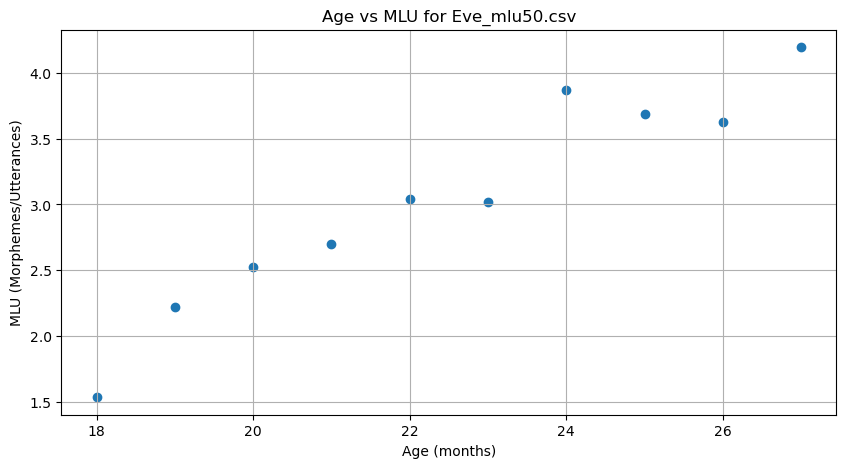

Spearman's rho for Eve_mlu50.csv: 0.9394

Chosen Transcripts for Eve_mlu50.csv: 
 ['010600a.ipcore.cex', '010700a.ipcore.cex', '010800.ipcore.cex', '010900a.ipcore.cex', '011000a.ipcore.cex', '011100a.ipcore.cex', '020000a.ipcore.cex', '020100a.ipcore.cex', '020200a.ipcore.cex', '020300a.ipcore.cex'] 

MLU Scores for Eve_mlu50.csv: 
 [1.533, 2.222, 2.521, 2.696, 3.042, 3.021, 3.87, 3.688, 3.63, 4.196] 

Ages for Eve_mlu50.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_mlu50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



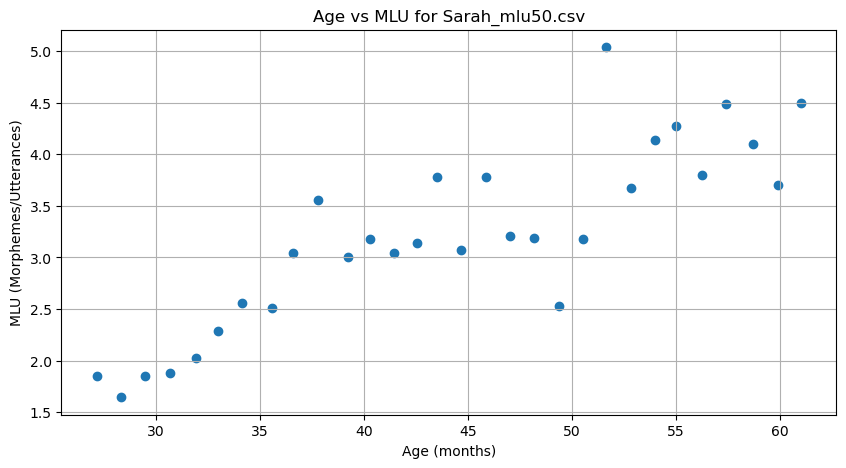

Spearman's rho for Sarah_mlu50.csv: 0.8784

Chosen Transcripts for Sarah_mlu50.csv: 
 ['020305.ipcore.cex', '020410.ipcore.cex', '020515.ipcore.cex', '020620.ipcore.cex', '020728.ipcore.cex', '020900.ipcore.cex', '021005.ipcore.cex', '021117.ipcore.cex', '030018a.ipcore.cex', '030124.ipcore.cex', '030307a.ipcore.cex', '030409.ipcore.cex', '030513.ipcore.cex', '030616.ipcore.cex', '030716.ipcore.cex', '030820.ipcore.cex', '030926a.ipcore.cex', '031030.ipcore.cex', '040005.ipcore.cex', '040111.ipcore.cex', '040216.ipcore.cex', '040319.ipcore.cex', '040425.ipcore.cex', '040529.ipcore.cex', '040700.ipcore.cex', '040807.ipcore.cex', '040912.ipcore.cex', '041021.ipcore.cex', '041126.ipcore.cex', '050030.ipcore.cex'] 

MLU Scores for Sarah_mlu50.csv: 
 [1.848, 1.646, 1.85, 1.881, 2.023, 2.286, 2.556, 2.512, 3.045, 3.561, 3.0, 3.18, 3.044, 3.143, 3.776, 3.068, 3.78, 3.205, 3.186, 2.532, 3.18, 5.036, 3.673, 4.14, 4.271, 3.8, 4.49, 4.1, 3.7, 4.5] 

Ages for Sarah_mlu50.csv: 
 [27.166666666666668

In [21]:
age_mlu_plots(mlu_files_50, spearman_rhos_50, age_files)

## Age vs MLU (100 Utterances)

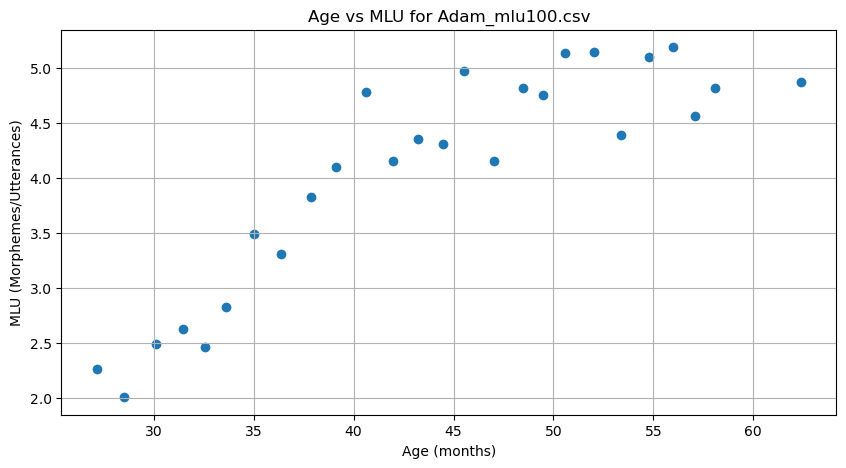

Spearman's rho for Adam_mlu100.csv: 0.8749

Chosen Transcripts for Adam_mlu100.csv: 
 ['020304.ipcore-100.cex', '020415.ipcore-100.cex', '020603.ipcore-100.cex', '020714.ipcore-100.cex', '020816.ipcore-100.cex', '020918.ipcore-100.cex', '021030.ipcore-100.cex', '030011.ipcore-100.cex', '030126.ipcore-100.cex', '030304.ipcore-100.cex', '030418.ipcore-100.cex', '030529.ipcore-100.cex', '030707.ipcore-100.cex', '030814.ipcore-100.cex', '030916.ipcore-100.cex', '031101.ipcore-100.cex', '040014.ipcore-100.cex', '040115.ipcore-100.cex', '040217.ipcore-100.cex', '040401.ipcore-100.cex', '040511.ipcore-100.cex', '040624.ipcore-100.cex', '040729.ipcore-100.cex', '040902.ipcore-100.cex', '041002.ipcore-100.cex', '050212.ipcore-100.cex'] 

MLU Scores for Adam_mlu100.csv: 
 [2.27, 2.01, 2.495, 2.632, 2.465, 2.83, 3.495, 3.313, 3.83, 4.106, 4.786, 4.162, 4.36, 4.316, 4.98, 4.156, 4.823, 4.76, 5.14, 5.152, 4.39, 5.103, 5.192, 4.566, 4.818, 4.876] 

Ages for Adam_mlu100.csv: 
 [27.133333333333333, 28

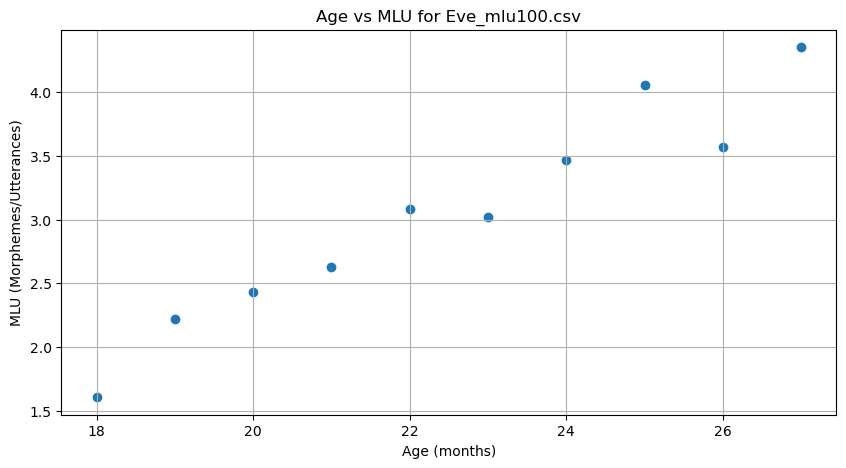

Spearman's rho for Eve_mlu100.csv: 0.9758

Chosen Transcripts for Eve_mlu100.csv: 
 ['010600a.ipcore-100.cex', '010700a.ipcore-100.cex', '010800.ipcore-100.cex', '010900a.ipcore-100.cex', '011000a.ipcore-100.cex', '011100a.ipcore-100.cex', '020000a.ipcore-100.cex', '020100a.ipcore-100.cex', '020200a.ipcore-100.cex', '020300a.ipcore-100.cex'] 

MLU Scores for Eve_mlu100.csv: 
 [1.607, 2.221, 2.436, 2.626, 3.085, 3.022, 3.468, 4.053, 3.571, 4.352] 

Ages for Eve_mlu100.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_mlu100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



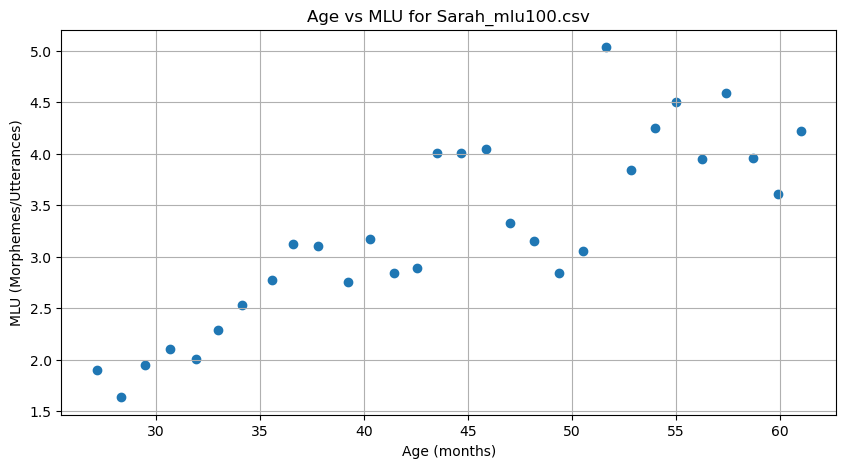

Spearman's rho for Sarah_mlu100.csv: 0.8394

Chosen Transcripts for Sarah_mlu100.csv: 
 ['020305.ipcore-100.cex', '020410.ipcore-100.cex', '020515.ipcore-100.cex', '020620.ipcore-100.cex', '020728.ipcore-100.cex', '020900.ipcore-100.cex', '021005.ipcore-100.cex', '021117.ipcore-100.cex', '030018a.ipcore-100.cex', '030124.ipcore-100.cex', '030307a.ipcore-100.cex', '030409.ipcore-100.cex', '030513.ipcore-100.cex', '030616.ipcore-100.cex', '030716.ipcore-100.cex', '030820.ipcore-100.cex', '030926a.ipcore-100.cex', '031030.ipcore-100.cex', '040005.ipcore-100.cex', '040111.ipcore-100.cex', '040216.ipcore-100.cex', '040319.ipcore-100.cex', '040425.ipcore-100.cex', '040529.ipcore-100.cex', '040700.ipcore-100.cex', '040807.ipcore-100.cex', '040912.ipcore-100.cex', '041021.ipcore-100.cex', '041126.ipcore-100.cex', '050030.ipcore-100.cex'] 

MLU Scores for Sarah_mlu100.csv: 
 [1.895, 1.635, 1.948, 2.106, 2.011, 2.293, 2.533, 2.776, 3.12, 3.105, 2.755, 3.177, 2.84, 2.889, 4.011, 4.012, 4.046, 3.3

In [22]:
age_mlu_plots(mlu_files_100, spearman_rhos_100, age_files)

## Age vs MLU (All Utterances)

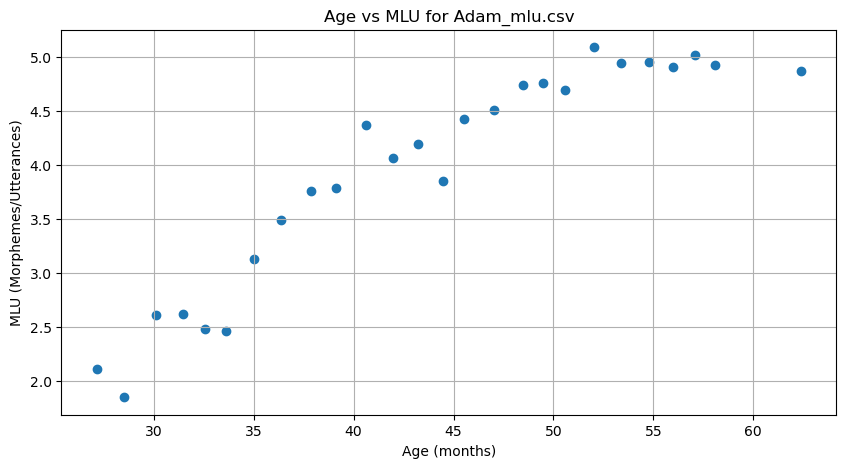

Spearman's rho for Adam_mlu.csv: 0.9528

Chosen Transcripts for Adam_mlu.csv: 
 ['020304.cha', '020415.cha', '020603.cha', '020714.cha', '020816.cha', '020918.cha', '021030.cha', '030011.cha', '030126.cha', '030304.cha', '030418.cha', '030529.cha', '030707.cha', '030814.cha', '030916.cha', '031101.cha', '040014.cha', '040115.cha', '040217.cha', '040401.cha', '040511.cha', '040624.cha', '040729.cha', '040902.cha', '041002.cha', '050212.cha'] 

MLU Scores for Adam_mlu.csv: 
 [2.11, 1.853, 2.615, 2.627, 2.481, 2.464, 3.13, 3.497, 3.761, 3.792, 4.368, 4.069, 4.2, 3.856, 4.429, 4.514, 4.74, 4.763, 4.692, 5.092, 4.949, 4.955, 4.907, 5.018, 4.926, 4.876] 

Ages for Adam_mlu.csv: 
 [27.133333333333333, 28.5, 30.1, 31.46666666666667, 32.53333333333333, 33.6, 35.0, 36.36666666666667, 37.86666666666667, 39.13333333333333, 40.6, 41.96666666666667, 43.233333333333334, 44.46666666666667, 45.53333333333333, 47.03333333333333, 48.46666666666667, 49.5, 50.56666666666666, 52.03333333333333, 53.366666666

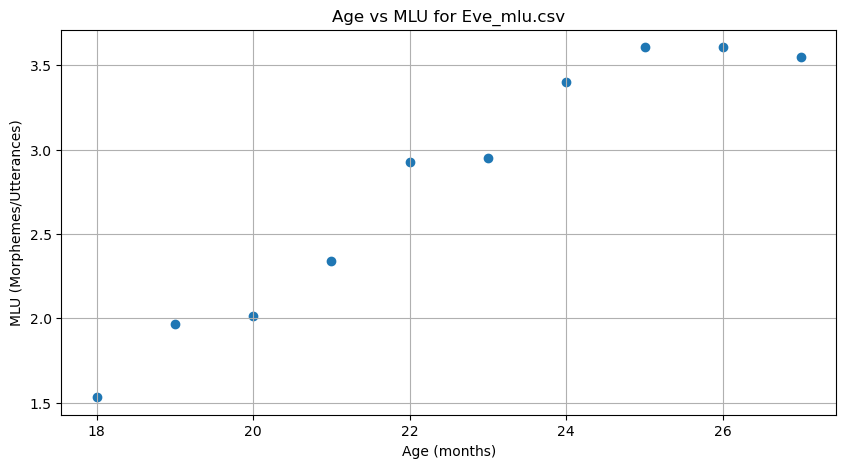

Spearman's rho for Eve_mlu.csv: 0.9636

Chosen Transcripts for Eve_mlu.csv: 
 ['010600a.cha', '010700a.cha', '010800.cha', '010900a.cha', '011000a.cha', '011100a.cha', '020000a.cha', '020100a.cha', '020200a.cha', '020300a.cha'] 

MLU Scores for Eve_mlu.csv: 
 [1.533, 1.964, 2.016, 2.337, 2.925, 2.95, 3.401, 3.605, 3.606, 3.549] 

Ages for Eve_mlu.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_mlu.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



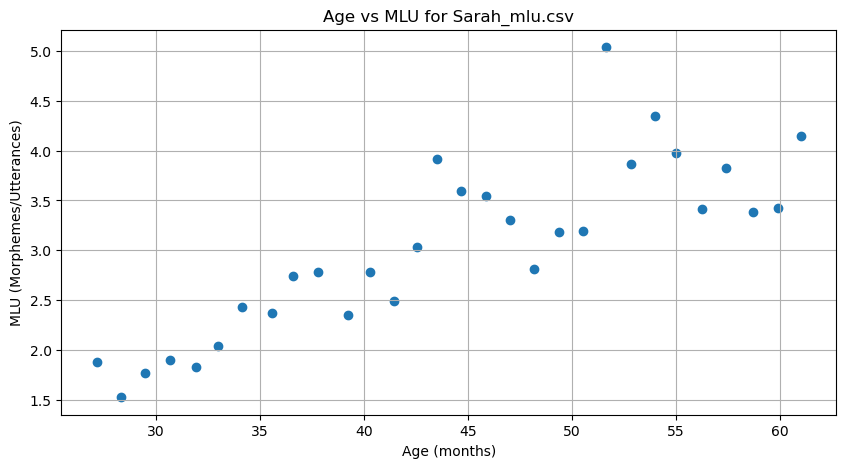

Spearman's rho for Sarah_mlu.csv: 0.8661

Chosen Transcripts for Sarah_mlu.csv: 
 ['020305.cha', '020410.cha', '020515.cha', '020620.cha', '020728.cha', '020900.cha', '021005.cha', '021117.cha', '030018a.cha', '030124.cha', '030307a.cha', '030409.cha', '030513.cha', '030616.cha', '030716.cha', '030820.cha', '030926a.cha', '031030.cha', '040005.cha', '040111.cha', '040216.cha', '040319.cha', '040425.cha', '040529.cha', '040700.cha', '040807.cha', '040912.cha', '041021.cha', '041126.cha', '050030.cha'] 

MLU Scores for Sarah_mlu.csv: 
 [1.882, 1.527, 1.769, 1.905, 1.834, 2.045, 2.427, 2.369, 2.74, 2.786, 2.353, 2.779, 2.491, 3.033, 3.913, 3.598, 3.548, 3.302, 2.816, 3.184, 3.197, 5.036, 3.862, 4.348, 3.979, 3.416, 3.822, 3.386, 3.42, 4.142] 

Ages for Sarah_mlu.csv: 
 [27.166666666666668, 28.333333333333332, 29.5, 30.666666666666668, 31.933333333333334, 33.0, 34.166666666666664, 35.56666666666666, 36.6, 37.8, 39.233333333333334, 40.3, 41.43333333333334, 42.53333333333333, 43.533333333333

In [23]:
age_mlu_plots(mlu_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [24]:
spearman_rhos_50

[['Adam_mlu50.csv', 0.8734610633928355],
 ['Eve_mlu50.csv', 0.9393939393939393],
 ['Sarah_mlu50.csv', 0.8784069472533214]]

In [25]:
spearman_rhos_100

[['Adam_mlu100.csv', 0.8748717948717948],
 ['Eve_mlu100.csv', 0.9757575757575757],
 ['Sarah_mlu100.csv', 0.839377085650723]]

In [26]:
spearman_rhos_all

[['Adam_mlu.csv', 0.9528205128205127],
 ['Eve_mlu.csv', 0.9636363636363635],
 ['Sarah_mlu.csv', 0.8660734149054505]]